In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
train = pd.read_csv('./datasets/train.csv')#, na_values='', keep_default_na=False)
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
train.isnull().sum().sort_values(ascending=False).head(30)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Cond        114
Garage Qual        114
Garage Yr Blt      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
Garage Area          1
Bsmt Unf SF          1
BsmtFin SF 2         1
Total Bsmt SF        1
BsmtFin SF 1         1
Overall Cond         0
Exterior 2nd         0
Exterior 1st         0
Roof Matl            0
dtype: int64

In [4]:
train.isnull().sum()[train.isnull().sum() >= 1000]

Alley           1911
Fireplace Qu    1000
Pool QC         2042
Fence           1651
Misc Feature    1986
dtype: int64

In [5]:
many_missing_cols = train.isnull().sum()[train.isnull().sum() >= 1000].index
train.loc[:, many_missing_cols].fillna('NA').isnull().sum().sort_values(ascending=False)

Misc Feature    0
Fence           0
Pool QC         0
Fireplace Qu    0
Alley           0
dtype: int64

In [6]:
train.loc[:, many_missing_cols] = train.loc[:, many_missing_cols].fillna('NA')

In [7]:
train.isnull().sum().sort_values(ascending=False)

Lot Frontage     330
Garage Yr Blt    114
Garage Finish    114
Garage Qual      114
Garage Cond      114
                ... 
2nd Flr SF         0
1st Flr SF         0
Electrical         0
Central Air        0
Id                 0
Length: 81, dtype: int64

In [8]:
train.loc[train['Lot Frontage']==0, 'Lot Frontage']

Series([], Name: Lot Frontage, dtype: float64)

In [9]:
train['Lot Frontage'].describe()

count    1721.000000
mean       69.055200
std        23.260653
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

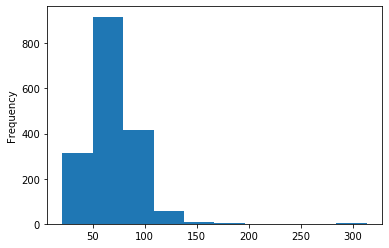

In [10]:
train['Lot Frontage'].plot(kind='hist')

In [11]:
train.corr()['Lot Frontage'].sort_values(ascending=False)

Lot Frontage       1.000000
Lot Area           0.574024
1st Flr SF         0.463900
Gr Liv Area        0.383856
TotRms AbvGrd      0.362704
Garage Area        0.358457
Total Bsmt SF      0.356584
SalePrice          0.341842
Garage Cars        0.297143
Fireplaces         0.253456
Bedroom AbvGr      0.220414
Mas Vnr Area       0.218218
BsmtFin SF 1       0.214178
Overall Qual       0.194808
Open Porch SF      0.184958
Pool Area          0.156575
Full Bath          0.152812
Bsmt Unf SF        0.127605
Wood Deck SF       0.115180
Bsmt Full Bath     0.111441
Year Built         0.109504
Year Remod/Add     0.085052
Screen Porch       0.074819
Garage Yr Blt      0.067865
Misc Val           0.051676
BsmtFin SF 2       0.036740
Half Bath          0.035842
3Ssn Porch         0.031855
Kitchen AbvGr      0.015856
2nd Flr SF         0.013700
Yr Sold            0.009112
Low Qual Fin SF   -0.000300
Enclosed Porch    -0.003302
Mo Sold           -0.017389
Id                -0.024967
Bsmt Half Bath    -0

In [12]:
train.loc[train['Lot Frontage'].isnull(), ['Lot Area', 'SalePrice']].describe()

,Lot Area,SalePrice
count,330.000000,330.000000
mean,12373.660606,188098.403030
std,12102.692705,59366.305455
min,1533.000000,61000.000000
25%,8127.000000,144000.000000
50%,10601.500000,176500.000000
75%,12958.250000,221500.000000
max,159000.000000,466500.000000


In [13]:
train.loc[~train['Lot Frontage'].isnull(), ['Lot Area', 'SalePrice']].describe()

,Lot Area,SalePrice
count,1721.000000,1721.000000
mean,9622.564788,180198.654852
std,4994.723071,82480.345050
min,1300.000000,12789.000000
25%,7301.000000,128000.000000
50%,9239.000000,158500.000000
75%,11075.000000,211000.000000
max,70761.000000,611657.000000


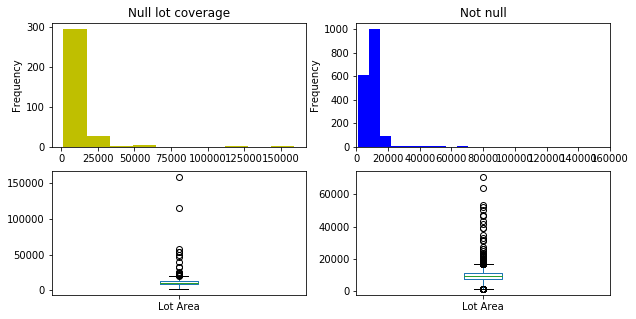

In [14]:
#plt.style.use('dark_background')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax = ax.ravel()
train.loc[train['Lot Frontage'].isnull(), 'Lot Area'].plot(kind='hist', ax=ax[0], title= 'Null lot coverage', color='y')
train.loc[-train['Lot Frontage'].isnull(), 'Lot Area'].plot(kind='hist', ax=ax[1], title= 'Not null', color='b',
                                                           xlim=(0,160_000))
train.loc[train['Lot Frontage'].isnull(), 'Lot Area'].plot(kind='box', ax=ax[2])
train.loc[~train['Lot Frontage'].isnull(), 'Lot Area'].plot(kind='box', ax=ax[3])

In [15]:
train.loc[train['Lot Frontage'].isnull(), 'Lot Area'].median()

10601.5

In [16]:
train.loc[~train['Lot Frontage'].isnull(), 'Lot Area'].median()

9239.0

In [17]:
train.loc[(train['Garage Cars'].isnull()) | (train['Garage Area'].isnull())]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,910201180,70,RM,50.0,9060,Pave,NA,Reg,Lvl,...,0,0,NA,MnPrv,NA,0,3,2007,WD,150909


In [18]:
garage_cols = train.columns[train.columns.str.contains('Garage')]
garage_cols

Index(['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond'],
      dtype='object')

In [19]:
[col for col in train.columns if 'Garage' in col]

['Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond']

In [20]:
train.loc[(train['Garage Cars'].isnull()) | (train['Garage Area'].isnull()), garage_cols]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
1712,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
train.loc[train['Garage Type'] == 'Detchd', garage_cols]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
2,Detchd,1953.0,Unf,1.0,246.0,TA,TA
4,Detchd,1957.0,Unf,2.0,484.0,TA,TA
8,Detchd,1952.0,Unf,1.0,420.0,TA,TA
10,Detchd,1971.0,Unf,1.0,264.0,TA,TA
13,Detchd,2000.0,Unf,2.0,480.0,TA,TA
...,...,...,...,...,...,...,...
2026,Detchd,1927.0,Unf,2.0,264.0,TA,TA
2030,Detchd,1964.0,RFn,1.0,384.0,TA,TA
2035,Detchd,1922.0,Unf,1.0,252.0,TA,Fa
2047,Detchd,1961.0,Unf,2.0,539.0,TA,TA


In [22]:
train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.800207
Gr Liv Area        0.697038
Garage Area        0.650270
Garage Cars        0.648220
Total Bsmt SF      0.628925
1st Flr SF         0.618486
Year Built         0.571849
Year Remod/Add     0.550370
Full Bath          0.537969
Garage Yr Blt      0.533922
Mas Vnr Area       0.512230
TotRms AbvGrd      0.504014
Fireplaces         0.471093
BsmtFin SF 1       0.423519
Lot Frontage       0.341842
Open Porch SF      0.333476
Wood Deck SF       0.326490
Lot Area           0.296566
Bsmt Full Bath     0.283662
Half Bath          0.283001
2nd Flr SF         0.248452
Bsmt Unf SF        0.190210
Bedroom AbvGr      0.137067
Screen Porch       0.134581
3Ssn Porch         0.048732
Mo Sold            0.032735
Pool Area          0.023106
BsmtFin SF 2       0.016255
Misc Val          -0.007375
Yr Sold           -0.015203
Low Qual Fin SF   -0.041594
Bsmt Half Bath    -0.045328
Id                -0.051398
MS SubClass       -0.087335
Overall Cond      -0

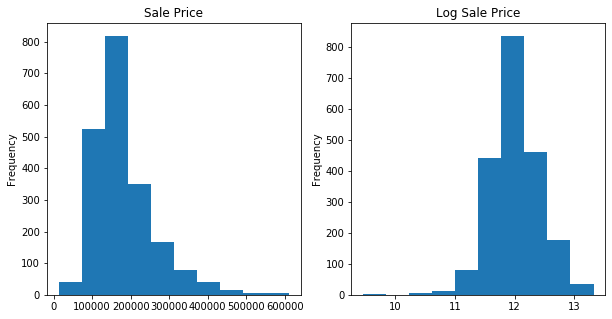

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
train["SalePrice"].plot(kind='hist', title='Sale Price', ax=ax[0])
np.log(train['SalePrice']).plot(kind='hist', title = 'Log Sale Price', ax=ax[1])

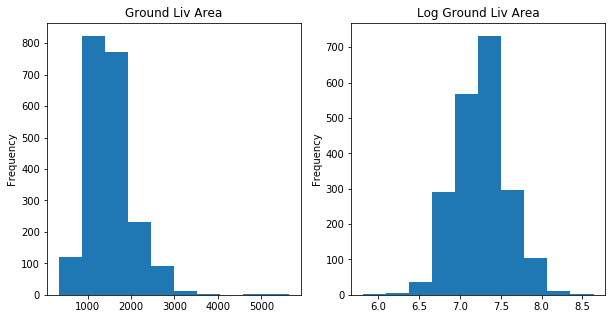

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
train['Gr Liv Area'].plot(kind='hist', title='Ground Liv Area', ax=ax[0])
np.log(train['Gr Liv Area']).plot(kind='hist', title='Log Ground Liv Area', ax=ax[1]);

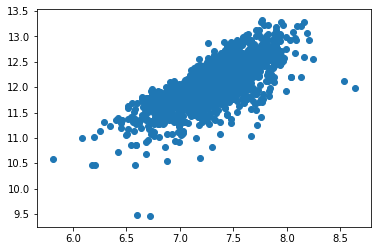

In [25]:
plt.scatter(x=np.log(train['Gr Liv Area']), y=np.log(train['SalePrice']));

In [26]:
import scipy.stats as stats

In [27]:
stats.pearsonr(np.array(np.log(train['SalePrice'])), np.array(np.log(train['Gr Liv Area'])))

(0.7213649082731495, 0.0)

In [28]:
train.loc[:, ['SalePrice', 'Gr Liv Area']].corr()

,SalePrice,Gr Liv Area
SalePrice,1.000000,0.697038
Gr Liv Area,0.697038,1.000000


In [29]:
train['log_saleprice'] = np.log(train['SalePrice'])
train['log_gr_liv_area'] = np.log(train['Gr Liv Area'])

In [30]:
train.loc[:, ['log_saleprice', 'log_gr_liv_area']].corr()

,log_saleprice,log_gr_liv_area
log_saleprice,1.000000,0.721365
log_gr_liv_area,0.721365,1.000000


In [31]:
train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
log_saleprice      0.946134
Overall Qual       0.800207
Gr Liv Area        0.697038
log_gr_liv_area    0.695047
Garage Area        0.650270
Garage Cars        0.648220
Total Bsmt SF      0.628925
1st Flr SF         0.618486
Year Built         0.571849
Year Remod/Add     0.550370
Full Bath          0.537969
Garage Yr Blt      0.533922
Mas Vnr Area       0.512230
TotRms AbvGrd      0.504014
Fireplaces         0.471093
BsmtFin SF 1       0.423519
Lot Frontage       0.341842
Open Porch SF      0.333476
Wood Deck SF       0.326490
Lot Area           0.296566
Bsmt Full Bath     0.283662
Half Bath          0.283001
2nd Flr SF         0.248452
Bsmt Unf SF        0.190210
Bedroom AbvGr      0.137067
Screen Porch       0.134581
3Ssn Porch         0.048732
Mo Sold            0.032735
Pool Area          0.023106
BsmtFin SF 2       0.016255
Misc Val          -0.007375
Yr Sold           -0.015203
Low Qual Fin SF   -0.041594
Bsmt Half Bath    -0.045328
Id                -0

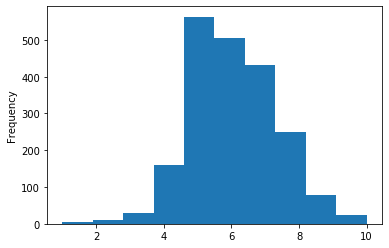

In [32]:
train['Overall Qual'].plot(kind='hist');

In [33]:
train['Overall Qual'].value_counts()

5     563
6     506
7     431
8     250
4     159
9      77
3      29
10     23
2       9
1       4
Name: Overall Qual, dtype: int64

In [34]:
cat_cols = list(train.columns[(train.columns.str.contains('Cond')) | (train.columns.str.contains('Qual'))])
# train.select_dtypes(include='object')

In [35]:
cat_cols.append('SalePrice')

In [36]:
train.loc[:, cat_cols].corr()['SalePrice']

Overall Qual       0.800207
Overall Cond      -0.097019
Low Qual Fin SF   -0.041594
SalePrice          1.000000
Name: SalePrice, dtype: float64

In [37]:
cat_replace_dict = {'Ex':5
                    ,'Gd':4
                    ,'TA':3
                    ,'Fa':2
                    ,'Po':1
                    ,'NA':0}

In [38]:
train.loc[:, cat_cols].head()

,Condition 1,Condition 2,Overall Qual,Overall Cond,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Low Qual Fin SF,Kitchen Qual,Garage Qual,Garage Cond,SalePrice
0,RRAe,Norm,6,8,Gd,TA,TA,TA,0,Gd,TA,TA,130500
1,Norm,Norm,7,5,Gd,TA,Gd,TA,0,Gd,TA,TA,220000
2,Norm,Norm,5,7,TA,Gd,TA,TA,0,Gd,TA,TA,109000
3,Norm,Norm,5,5,TA,TA,Gd,TA,0,TA,TA,TA,174000
4,Norm,Norm,6,8,TA,TA,Fa,Gd,0,TA,TA,TA,138500


In [104]:
train.replace(np.nan, 'NA', inplace=True)

In [40]:
train.loc[:, cat_cols].replace(cat_replace_dict).head()

,Condition 1,Condition 2,Overall Qual,Overall Cond,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Low Qual Fin SF,Kitchen Qual,Garage Qual,Garage Cond,SalePrice
0,RRAe,Norm,6,8,4,3,3,3,0,4,3,3,130500
1,Norm,Norm,7,5,4,3,4,3,0,4,3,3,220000
2,Norm,Norm,5,7,3,4,3,3,0,4,3,3,109000
3,Norm,Norm,5,5,3,3,4,3,0,3,3,3,174000
4,Norm,Norm,6,8,3,3,2,4,0,3,3,3,138500


In [41]:
train.loc[:, cat_cols].replace(cat_replace_dict).dtypes

Condition 1        object
Condition 2        object
Overall Qual        int64
Overall Cond        int64
Exter Qual          int64
Exter Cond          int64
Bsmt Qual           int64
Bsmt Cond           int64
Low Qual Fin SF     int64
Kitchen Qual        int64
Garage Qual         int64
Garage Cond         int64
SalePrice           int64
dtype: object

In [42]:
train.loc[:, cat_cols].replace(cat_replace_dict).corr()['SalePrice']

Overall Qual       0.800207
Overall Cond      -0.097019
Exter Qual         0.712146
Exter Cond         0.036418
Bsmt Qual          0.612188
Bsmt Cond          0.225075
Low Qual Fin SF   -0.041594
Kitchen Qual       0.692336
Garage Qual        0.285281
Garage Cond        0.265021
SalePrice          1.000000
Name: SalePrice, dtype: float64

# Dummy Variables on Categorical Data

In [43]:
train['Neighborhood'].nunique()

28

In [44]:
train = pd.get_dummies(train, prefix='Neighborhood', drop_first=True)
train

,Id,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,...,Neighborhood_Shed,Neighborhood_TenC,Neighborhood_CWD,Neighborhood_Con,Neighborhood_ConLD,Neighborhood_ConLI,Neighborhood_ConLw,Neighborhood_New,Neighborhood_Oth,Neighborhood_WD
0,109,533352170,60,13517,6,8,1976,2005,725,754,...,0,0,0,0,0,0,0,0,0,1
1,544,531379050,60,11492,7,5,1996,1997,913,1209,...,0,0,0,0,0,0,0,0,0,1
2,153,535304180,20,7922,5,7,1953,2007,1057,0,...,0,0,0,0,0,0,0,0,0,1
3,318,916386060,60,9802,5,5,2006,2007,744,700,...,0,0,0,0,0,0,0,0,0,1
4,255,906425045,50,14235,6,8,1900,1993,831,614,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,11449,8,5,2007,2007,1728,0,...,0,0,0,0,0,0,0,0,0,1
2047,785,905377130,30,12342,4,5,1940,1950,861,0,...,0,0,0,0,0,0,0,0,0,1
2048,916,909253010,50,7558,6,6,1928,1950,1172,741,...,0,0,0,0,0,0,0,0,0,1
2049,639,535179160,20,10400,4,5,1956,1956,1200,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
import seaborn as sns

In [46]:
sns.boxplot(y=train['Neighborhood'], x=train['SalePrice'])

KeyError: 'Neighborhood'

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Text(0.5, 1.0, 'Corr of Ground living area and sale price')

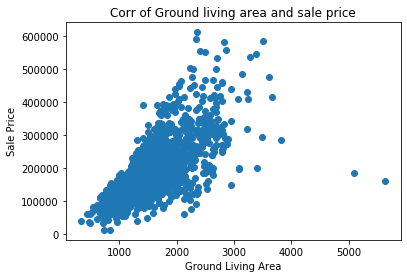

In [47]:
plt.scatter(train['Gr Liv Area'], train['SalePrice'])
plt.xlabel('Ground Living Area')
plt.ylabel('Sale Price')
plt.title('Corr of Ground living area and sale price')

In [53]:
#train.drop(train[train['Gr Liv Area'] > 4000].index, axis=0, inplace=True)

Text(0.5, 1.0, 'Corr of Ground living area and sale price')

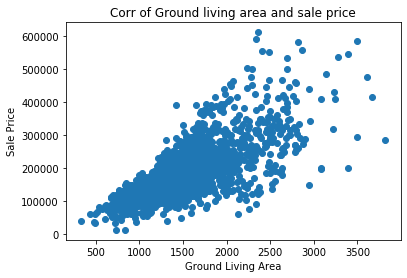

In [54]:
plt.scatter(train['Gr Liv Area'], train['SalePrice'])
plt.xlabel('Ground Living Area')
plt.ylabel('Sale Price')
plt.title('Corr of Ground living area and sale price')

In [64]:
y = train['SalePrice']
X = train[['Gr Liv Area']]
y_out = train['SalePrice'].drop([960, 1885], axis=0)
X_out = train[['Gr Liv Area']].drop([960, 1885], axis=0)

In [65]:
model = LinearRegression()
model_out = LinearRegression()

In [68]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
model_out.fit(X_out,y_out)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
model_preds = model.predict(X)

In [82]:
model_out_preds = model_out.predict(X)

In [75]:
r2_score(y, model_preds)

0.4858625928400594

In [87]:
r2_score(y, model_out_preds)

0.4838504454634496

In [84]:
mean_squared_error(y, model_preds)

3228203081.967726

In [85]:
mean_squared_error(y, model_out_preds)

3240837098.2289176

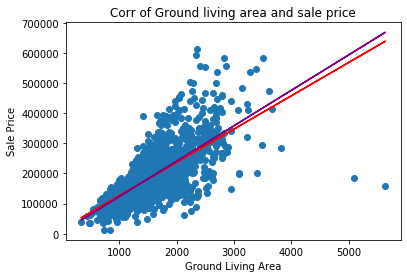

In [93]:
plt.scatter(train['Gr Liv Area'], train['SalePrice'])
plt.xlabel('Ground Living Area')
plt.ylabel('Sale Price')
plt.title('Corr of Ground living area and sale price')

plt.plot(X, model_preds, color='r')
plt.plot(X, model_out_preds, color='purple');

In [95]:
train.groupby('Neighborhood')['Lot Frontage'].mean().sort_values()

Neighborhood
BrDale     21.315789
MeadowV    26.809524
NPkVill    27.625000
Blueste    27.666667
Greens     40.000000
Blmngtn    47.250000
BrkSide    56.357143
SWISU      58.387097
StoneBr    60.058824
IDOTRR     61.890625
OldTown    62.802548
Somerst    63.982906
Edwards    66.930233
Veenker    67.846154
Crawfor    69.272727
SawyerW    70.493333
CollgCr    70.753247
Gilbert    72.025641
Sawyer     72.774648
NAmes      75.192453
Mitchel    75.476923
Timber     78.594595
NWAmes     80.965517
NridgHt    86.294118
NoRidge    88.305556
ClearCr    92.500000
GrnHill          NaN
Landmrk          NaN
Name: Lot Frontage, dtype: float64

In [99]:
train.groupby('MS SubClass')['SalePrice'].mean().sort_values()

MS SubClass
30      94936.346535
180    109672.727273
45     116372.727273
40     119125.000000
190    124310.326087
50     137270.000000
160    138452.215909
90     139296.333333
150    148400.000000
70     153354.455556
85     154398.214286
80     169569.825581
20     189305.488312
75     204875.000000
120    211813.613636
60     239225.769036
Name: SalePrice, dtype: float64

In [106]:
train.isnull().sum().sort_values(ascending=False)

SalePrice         0
Total Bsmt SF     0
Year Remod/Add    0
Roof Style        0
Roof Matl         0
                 ..
Kitchen Qual      0
TotRms AbvGrd     0
Functional        0
Fireplaces        0
Id                0
Length: 81, dtype: int64